In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_C_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,NaN,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	2
float64		column 2	3
float64		column 3	7
float64		column 4	2
float64		column 5	2
float64		column 6	5
float64		column 7	6
float64		column 8	3
float64		column 9	2
float64		column 10	4
float64		column 11	6
float64		column 12	6


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,398.000000,397.000000,393.000000,398.000000,398.000000,395.000000,394.000000,397.000000,398.000000,396.000000,394.000000,394.000000
mean,-0.088367,0.063159,2.031225,1.900377,1.939292,1.982319,2.026409,1.985237,1.964440,2.027901,1.957163,1.967085
std,2.558476,2.778747,1.132904,1.141401,1.162136,1.144715,1.161663,1.144266,1.148254,1.158401,1.151717,1.197639
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.688645,-0.838750,1.119200,0.945820,0.880200,1.042650,0.992897,1.027900,0.999935,1.035350,0.910822,0.904190
50%,-0.068013,0.039315,2.073400,1.786250,1.921050,2.020800,2.098100,1.975400,2.067200,2.082700,1.902000,1.938150
75%,0.768423,0.906360,2.985500,2.803325,2.982000,2.972250,2.971200,3.043800,2.930150,3.051075,2.959800,3.008675
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

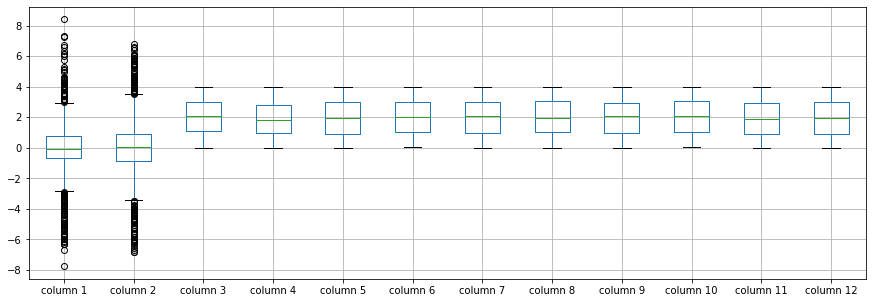

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.088367
column 2     0.063159
column 3     2.031225
column 4     1.900377
column 5     1.939292
column 6     1.982319
column 7     2.026409
column 8     1.985237
column 9     1.964440
column 10    2.027901
column 11    1.957163
column 12    1.967085
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.018783,-0.048234,-0.070523,0.004129,-0.009852,-0.017671,0.032508,-0.026712,0.045943,0.082768,-0.029658
column 2,0.018783,1.000000,-0.054833,0.015956,-0.086835,-0.093395,0.011243,-0.024838,-0.022190,0.020248,-0.022298,0.064997
column 3,-0.048234,-0.054833,1.000000,0.020366,-0.007525,-0.066225,-0.095187,0.068325,0.107892,-0.015852,-0.079331,-0.008523
column 4,-0.070523,0.015956,0.020366,1.000000,-0.002244,0.104172,-0.010881,0.097300,0.004287,0.077014,-0.020495,-0.063558
column 5,0.004129,-0.086835,-0.007525,-0.002244,1.000000,0.079267,0.047432,0.015215,-0.004261,0.029168,0.008401,-0.034894
column 6,-0.009852,-0.093395,-0.066225,0.104172,0.079267,1.000000,0.001744,0.063463,0.009509,0.008655,0.020149,-0.042320
column 7,-0.017671,0.011243,-0.095187,-0.010881,0.047432,0.001744,1.000000,-0.028659,0.090409,0.036573,0.007552,-0.062941
column 8,0.032508,-0.024838,0.068325,0.097300,0.015215,0.063463,-0.028659,1.000000,0.060086,-0.140546,-0.052636,-0.016048
column 9,-0.026712,-0.022190,0.107892,0.004287,-0.004261,0.009509,0.090409,0.060086,1.000000,0.011143,0.013648,0.049778
column 10,0.045943,0.020248,-0.015852,0.077014,0.029168,0.008655,0.036573,-0.140546,0.011143,1.000000,-0.005023,0.033601


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+11,12+11+11,12+11+11+11,12+11+11+11+11,12+11+11+11+11+11,12+11+11+11+11+11+11,12+11+11+11+11+11,12+11+11+11+11,12+11+11+11,12+11+11,12+11,12], vae_layer = False, seed = 12)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.69808349609375
Epoch: 1 , loss: 27.646650161743164
Epoch: 2 , loss: 27.552587814331055
Epoch: 3 , loss: 27.486736068725588
Epoch: 4 , loss: 27.519585800170898
Epoch: 5 , loss: 27.393283004760743
Epoch: 6 , loss: 27.332278900146484
Epoch: 7 , loss: 27.291817779541017
Epoch: 8 , loss: 27.124414367675783
Epoch: 9 , loss: 26.861798400878907
Epoch: 10 , loss: 26.218767471313477
Epoch: 11 , loss: 24.46027542114258
Epoch: 12 , loss: 22.740086288452147
Epoch: 13 , loss: 21.88209243774414
Epoch: 14 , loss: 21.765171356201172
Epoch: 15 , loss: 21.598786697387695
Epoch: 16 , loss: 21.329108657836915
Epoch: 17 , loss: 21.098392181396484
Epoch: 18 , loss: 20.805379943847655
Epoch: 19 , loss: 20.309240493774414
Epoch: 20 , loss: 20.499713745117187
Epoch: 21 , loss: 20.384470748901368
Epoch: 22 , loss: 20.409553909301756
Epoch: 23 , loss: 20.544502944946288
Epoch: 24 , loss: 20.1090193939209
Epoch: 25 , loss: 20.1

In [14]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [15]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     0.51454
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [16]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [17]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,-2.185299,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [18]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [19]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [20]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(13.369687871075483, 163.27447192538312)

In [21]:
NRMS=numerator/denominator
NRMS


0.0818847411565077

In [22]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [23]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,0.284301,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.277800,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.210000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.567160,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.377400,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.354060,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.686100,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.470100,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.410100,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [24]:
imputations[-1].to_excel("Difdoug_C_1(imp).xlsx", index=False, header=False)